In [1]:
from __future__ import print_function
import argparse
import glob
import os
import json

In [88]:
# json 파일 확인
filepath = 'C:/Users/Songhee/Desktop/AI_bootcamp/CP1/차량 및 사람 인지 영상/Validation/바운딩박스/대구광역시/[라벨]대구광역시_FLRR_2_01/20201204_대구광역시_left_4_0173/20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109055.json'
with open(filepath, "r", encoding='UTF-8') as json_file:
    json_data = json.load(json_file)
json_data

{'annotations': [{'id': '3b5c9bc9e3837ef21e04a4503e9677f9bcc8b835defdcbb9100fac80e9ae8904',
   'type': 'bbox',
   'attributes': {'일반차량': '세단'},
   'points': [[92, 572], [749, 572], [749, 874], [92, 874]],
   'label': '일반차량'},
  {'id': '31af3d3bf7416d6823fd9366cb98500c232729058a068089a460159426507c49',
   'type': 'bbox',
   'attributes': {'일반차량': '세단'},
   'points': [[730, 539], [1029, 539], [1029, 746], [730, 746]],
   'label': '일반차량'},
  {'id': 'cc8b034ef0f40bb0d07bdeadbc2f4df2468ea7e85fc75cef5000288fe06b3f4a',
   'type': 'bbox',
   'attributes': {'일반차량': '세단'},
   'points': [[1039, 522], [1219, 522], [1219, 663], [1039, 663]],
   'label': '일반차량'},
  {'id': '949a1cc0e53968e2df5d6c7ab0d7e09d8f9e0047bd1adfd1b52e7a849635c10f',
   'type': 'bbox',
   'attributes': {'일반차량': '세단'},
   'points': [[1650, 435], [1805, 435], [1805, 581], [1650, 581]],
   'label': '일반차량'},
  {'id': '42ba8f20a36ccddd751a9e8c86f2dfbcd28c9098f0d5055750781290eda92c85',
   'type': 'bbox',
   'attributes': {'일반차량': 'SU

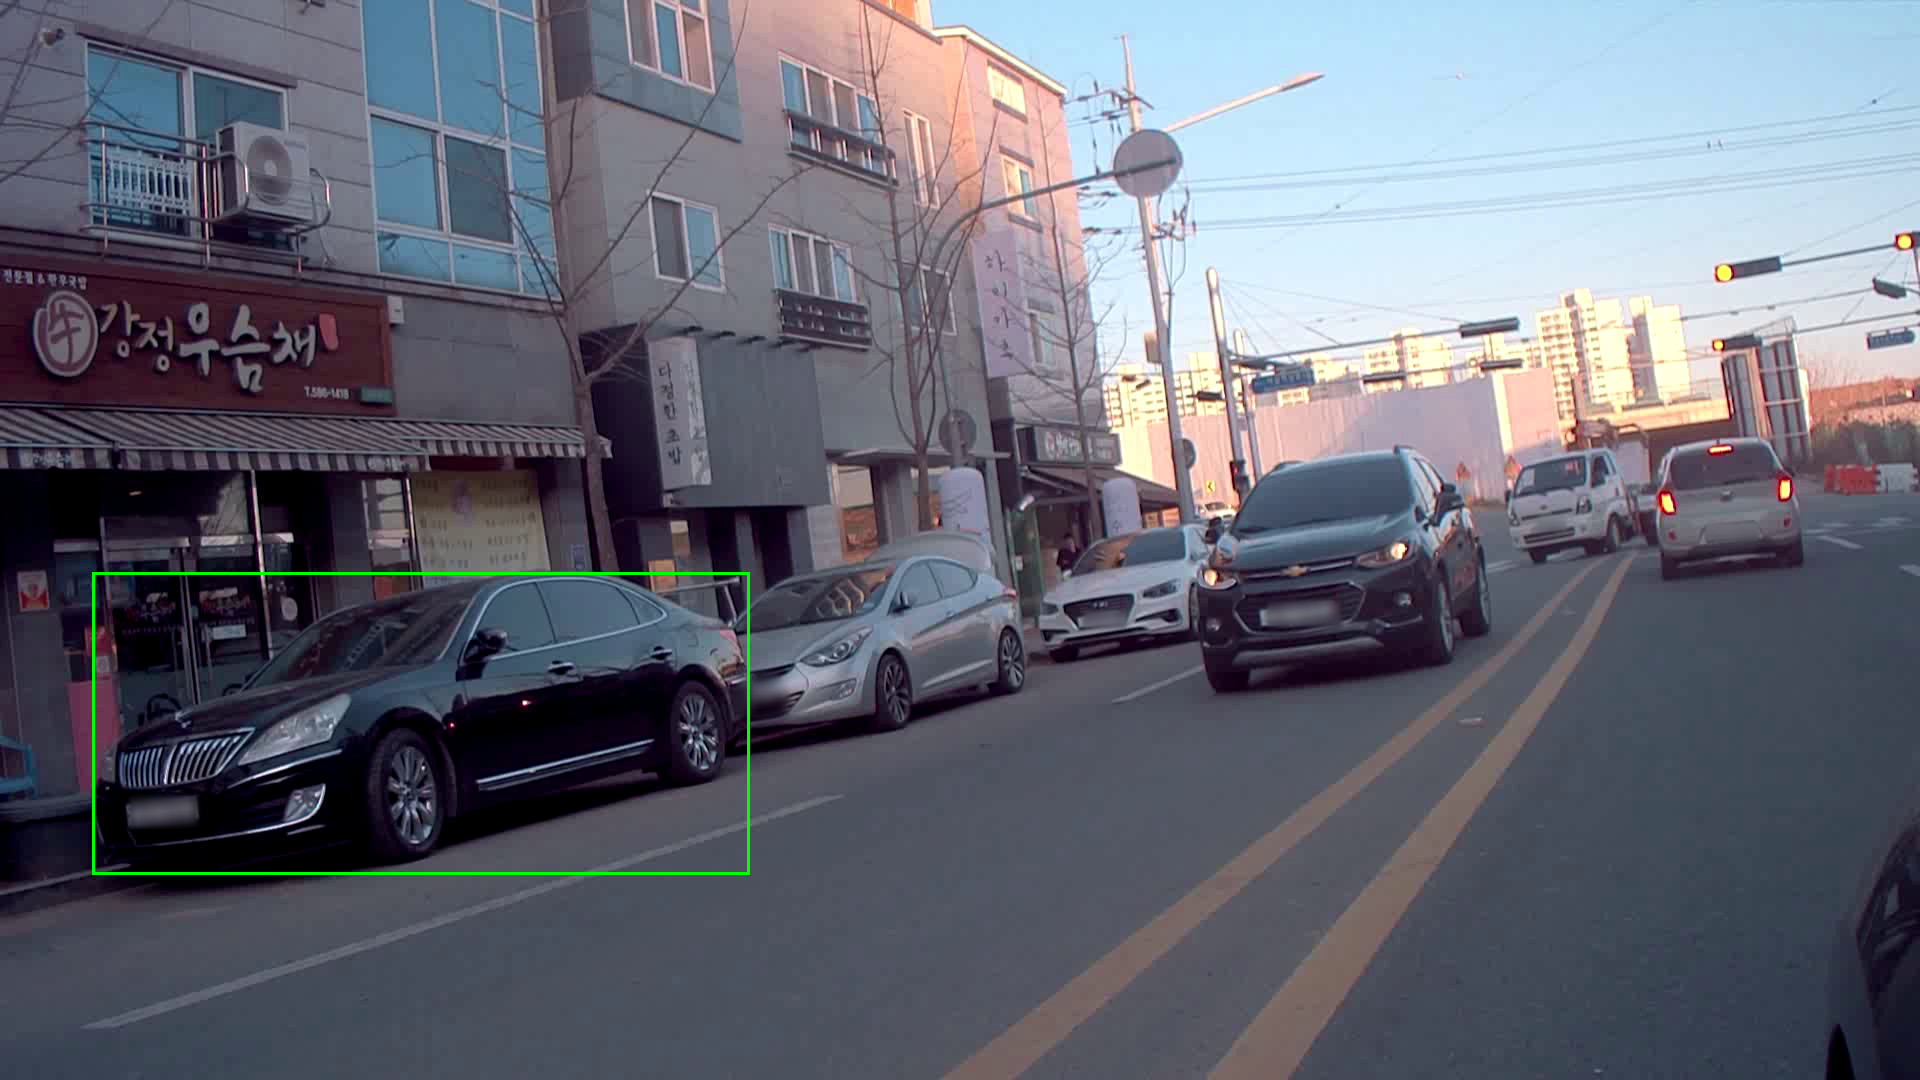

In [30]:
# 바운딩 박스 좌표 확인하기
from PIL import Image, ImageDraw

img = Image.open("C:/Users/Songhee/Desktop/AI_bootcamp/CP1/차량 및 사람 인지 영상/Validation/바운딩박스/대구광역시/[원천]대구광역시_FLRR_2_01/20201204_대구광역시_left_4_0173/20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109055.png").convert('RGB')
draw = ImageDraw.Draw(img)
draw.rectangle((92,572, 749,874), outline=(0,255,0), width = 3)

img

In [89]:
# json데이터 yolo 클래스에 맞도록 형식 변경
# 차량 데이터만 변경 (보행자 제외)
# 참고 사이트 : https://velog.io/@jeon_ys/yolo-%ED%81%B4%EB%9E%98%EC%8A%A4%EC%97%90-%EB%A7%9E%EB%8F%84%EB%A1%9D-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%98%95%EC%8B%9D-%EB%B0%94%EA%BE%B8%EA%B8%B0
folder_list = os.listdir("C:/Users/Songhee/Desktop/AI_bootcamp/CP1/차량 및 사람 인지 영상/Validation/바운딩박스/대구광역시/[라벨]대구광역시_FLRR_2_01")

for folder in folder_list:
    json_list = os.listdir('C:/Users/Songhee/Desktop/AI_bootcamp/CP1/차량 및 사람 인지 영상/Validation/바운딩박스/대구광역시/[라벨]대구광역시_FLRR_2_01/'+folder)
    for i in json_list:
        filepath = 'C:/Users/Songhee/Desktop/AI_bootcamp/CP1/차량 및 사람 인지 영상/Validation/바운딩박스/대구광역시/[라벨]대구광역시_FLRR_2_01/'+folder+'/'+i
        with open(filepath, "r", encoding='UTF-8') as json_file:
            json_data = json.load(json_file)

        image_name = json_data['filename'] # 이미지 파일명
        image_width = int(json_data['camera']['resolution_width']) # 이미지 넓이
        image_height = int(json_data['camera']['resolution_height']) # 이미지 높이
        annotations =  json_data['annotations']
        image_name = image_name.replace(".png", "")
        file = open("C:/Users/Songhee/Desktop/AI_bootcamp/CP1/차량 및 사람 인지 영상/Validation/바운딩박스/대구광역시/vehicle/labels/"+image_name + ".txt", "w")
        for annot in annotations:
            if annot['attributes'].get('일반차량'):
                x1, y1 = annot['points'][0] # 객체 1개의 bbox 위치 좌표
                x2, y2 = annot['points'][2]
                x1 = x1/image_width
                y1 = y1/image_height
                x2 = (x2-x1)/image_width
                y2 = (y2-y1)/image_height
                file.write(f"0 {x1:f} {y1:f} {x2:f} {y2:f}\n")
        file.close()

In [90]:
# 이미지 파일 한 폴더로 합치기
# 참고 사이트 : https://gagadi.tistory.com/9
import os
import shutil
import time

def read_all_file(path):
    output = os.listdir(path)
    file_list = []

    for i in output:
        if os.path.isdir(path+"/"+i):
            file_list.extend(read_all_file(path+"/"+i))
        elif os.path.isfile(path+"/"+i):
            file_list.append(path+"/"+i)

    return file_list

def copy_all_file(file_list, new_path):
    for src_path in file_list:
        file = src_path.split("/")[-1]
        shutil.copyfile(src_path, new_path+"/"+file)
        print("파일 {} 작업 완료".format(file)) # 작업한 파일명 출력
        
        
# start_time = time.time() # 작업 시작 시간 

src_path = "C:/Users/Songhee/Desktop/AI_bootcamp/CP1/차량 및 사람 인지 영상/Validation/바운딩박스/대구광역시/[원천]대구광역시_FLRR_2_01" # 기존 폴더 경로
new_path = "C:/Users/Songhee/Desktop/AI_bootcamp/CP1/차량 및 사람 인지 영상/Validation/바운딩박스/대구광역시/vehicle/images" # 옮길 폴더 경로

file_list = read_all_file(src_path)
copy_all_file(file_list, new_path)

# print("=" * 40)
# print("러닝 타임 : {}".format(time.time() - start_time)) # 총 소요시간 계산

파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109055.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109056.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109057.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109058.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109059.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109060.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109061.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109062.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109063.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109064.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109065.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109066.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109067.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109068.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109069.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109070.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109071.png 작업 완료
파일 20201204_대구광역시_-_달서구_맑음_주간_실외_left_0109072.pn

In [125]:
# 이미지 섞은 후 yolo 데이터셋 폴더 구조에 맞게 옮기기
import random

# 기존 폴더 경로
img_src_path = "C:/Users/Songhee/Desktop/AI_bootcamp/CP1/차량 및 사람 인지 영상/Validation/바운딩박스/대구광역시/vehicle/images/"
label_src_path = "C:/Users/Songhee/Desktop/AI_bootcamp/CP1/차량 및 사람 인지 영상/Validation/바운딩박스/대구광역시/vehicle/labels/"
# 옮길 폴더 경로
new_path = "C:/Users/Songhee/Desktop/AI_bootcamp/CP1/차량 및 사람 인지 영상/Validation/바운딩박스/대구광역시/vehicle/" 

# 폴더 내 이미지 파일 섞기
file_list = list(map(lambda x: x.replace('.png', ''), os.listdir(img_src_path)))
random.Random(1).shuffle(file_list)

# train : valid : test = 7 : 2 : 1 폴더 분할
num = 0
for file in file_list:
    if num < len(file_list)*0.7:
        category = 'train'
    elif num < len(file_list)*0.9:
        category = 'valid'
    else:
        category = 'test'
    
    shutil.copy(img_src_path+file+'.png', new_path +category+'/images/'+file+'.png')
    shutil.copy(label_src_path+file+'.txt', new_path +category+'/labels/'+file+'.txt')
    
    num+=1